# Take-Home Test for Data Analyst Position
## Step 1: Problem Definition

Objective

RetailPulse aims to gain actionable insights from the provided sales data to enhance business performance. The goal is to analyze sales trends, customer behavior, and the impact of external factors (e.g., weather and holidays) to optimize operations and improve sales outcomes.
Breaking Down the Problem into Smaller Objectives

#### 1. Primary Factors Influencing Sales

We need to identify key drivers of sales. These include:
	•	Product-level factors: Category, Sub-Category, Discount, Quantity, and Price.
	•	Customer-level factors: Segment, Location, and Demographics (e.g., Region, State).
	•	Operational factors: Ship Mode, Order Priority, and Processing Time.
	•	External factors: Holidays and Weather .(scraped and added to the intial dataset)
#### 2. Customer Demographics and Behavior Across Locations

Understand how customer preferences and spending habits vary by:
	•	Region: Analyze spending trends in different regions (e.g., East, West).
	•	City/State: Evaluate specific cities or states with high/low customer engagement.
	•	Segments: Compare segments such as Consumer, Corporate, and Home Office.

#### 3. Impact of External Factors

We will assess how external events influence sales:
	•	Holidays:
	•	Do sales spike on holidays like Black Friday or Christmas?
	•	How much do holiday promotions affect sales and profits?
	•	Weather:
	•	Integration of weather data will help us analyze seasonal patterns and conditions that may impact sales.

#### 4. Key Performance Indicators (KPIs)

KPIs will help measure the success and performance of the business:
	•	Sales KPIs:
	•	Total Revenue and Growth Rate (overall and by category).
	•	Sales Distribution by Category, Sub-Category, and Region.
	•	Customer KPIs:
	•	Customer Retention Rate (frequency of purchases).
	•	Average Revenue per Customer.
	•	High-value customer identification.
	•	Profitability KPIs:
	•	Profit Margins across categories.
	•	Contribution of Discounts to Revenue and Profit.
	•	Operational KPIs:
	•	Average Processing Time (Order to Shipping).
	•	Order Priorities affecting delivery performance.

## Step 2: Data Collection

#### Internal Data

For this analysis, we are working with a synthetic dataset (Sales_data.csv) that closely mimics real-world retail sales data. The dataset includes:
#### 1.	Sales Data:
	•	Fields:
	•	Transaction_ID: Unique identifier for each transaction.
	•	Store_ID: Unique identifier for each store.
	•	Product_ID: Unique identifier for each product.
	•	Order_Date and Ship_Date: Dates for order placement and shipping.
	•	Quantity, Sales, Profit: Metrics related to the transaction.
	•	Discount: Discount applied to the transaction.
	•	Total_Sales and Total_Profit: Computed fields for total transaction value and profit.
 
#### 2.	Customer Data:
	•	Fields:
	•	Customer_ID: Unique identifier for each customer.
	•	Segment: Market segment of the customer (e.g., Consumer, Corporate, Home Office).
	•	Region, City, State, Country: Location data for customers.
 
#### 3.	Store Data:
	•	Fields:
	•	Store_ID: Unique identifier for each store.
	•	Category and Sub-Category: Product classifications.
	•	Order_Priority: Priority level for each order (e.g., High, Medium, Low).
	•	Ship_Mode: Mode of shipping (e.g., Standard Class, Same Day).

### External Data

To enhance the analysis, we will integrate external datasets that capture weather conditions and holiday calendars.
#### 1.	Holiday Data:
	•	Source: Public holiday datasets or APIs (e.g., Google Holidays API or holidays Python library).
	•	Value: Identifies how holidays like Black Friday, Christmas, and Thanksgiving impact sales. These holidays often correlate with significant demand spikes.
 
#### 2.	Weather Data:
	•	Source: Historical weather data from APIs like OpenWeatherMap or WeatherStack.
	•	Value: Weather conditions (e.g., sunny, rainy, snowy) influence shopping behavior. For instance:
	•	Rainy weather might reduce foot traffic to physical stores.
	•	Cold weather might increase online shopping for winter-related products.

In [3]:
!pip install streamlit streamlit_jupyter pandas plotly
!pip install plotly pandas ipywidgets


  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.8.1
    Uninstalling ipywidgets-7.8.1:
      Successfully uninstalled ipywidgets-7.8.1


In [5]:
import pandas as pd
import numpy as np
%config Application.verbose_crash=True
# Load the dataset
file_path = "Sales_data.csv"
sales_data = pd.read_csv(file_path)

# Convert dates to datetime format
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"])
sales_data["Ship_Date"] = pd.to_datetime(sales_data["Ship_Date"])

# Step 1: Add Holiday Flag
holidays = pd.to_datetime(["2023-11-25", "2023-12-25", "2024-11-28", "2024-12-25"])  # Example holidays
sales_data["Holiday_Flag"] = sales_data["Order_Date"].isin(holidays).astype(int)



In [7]:
# Step 2: Calculate Customer-Level Metrics
# Average Spend per Customer
avg_spend = sales_data.groupby("Customer_ID")["Total_Sales"].mean().reset_index().rename(columns={"Total_Sales": "Avg_Spend"})

# Repeat Purchases per Customer
repeat_purchases = sales_data.groupby("Customer_ID")["Order_ID"].count().reset_index().rename(columns={"Order_ID": "Repeat_Purchases"})

# Merge metrics into the main dataset
sales_data = sales_data.merge(avg_spend, on="Customer_ID", how="left")
sales_data = sales_data.merge(repeat_purchases, on="Customer_ID", how="left")



In [9]:
# Step 3: Calculate Store-Level Metrics
# Category Performance (Total Sales by Category)
category_performance = sales_data.groupby("Category")["Total_Sales"].sum().reset_index().rename(columns={"Total_Sales": "Category_Sales"})

# Save the preprocessed dataset
file_path_updated = "sales_data_with_metrics.csv"
sales_data.to_csv(file_path_updated, index=False)

# Display the first few rows
#print(sales_data.head())
print("Updated dataset with metrics saved to:", file_path_updated)

Updated dataset with metrics saved to: sales_data_with_metrics.csv


In [39]:
weather_data = pd.read_csv("weather_data.csv")
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"])
weather_data["Date"] = pd.to_datetime(weather_data["Date"])
# Merge weather data with sales data on Order_Date and Region
sales_data = sales_data.merge(
    weather_data,
    how="left",
    left_on=["Order_Date", "Region"],
    right_on=["Date", "Region"]
)

# Drop unnecessary Date column from weather data
sales_data.drop(columns=["Date"], inplace=True)

# Save the updated dataset with weather data
file_path_updated = "sales_data_with_weather.csv"
sales_data.to_csv(file_path_updated, index=False)

print(f"Updated dataset saved to: {file_path_updated}")

Updated dataset saved to: sales_data_with_weather.csv


In [41]:
sales_data.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,City,State,Country,Region,...,Processing_Time,Total_Sales,Total_Profit,Holiday_Flag,Avg_Spend,Repeat_Purchases,Customer_Cluster,Weather_Condition,Temperature,Rainfall
0,ORD-00001,2023-05-06 14:02:34.110822164,2024-01-23 13:28:34.662932588,Second Class,CUST-0559,Consumer,Miami,California,United States,East,...,261,5374.33,5155.28,0,4846.102500,4,1,Snowy,6.4,47.0
1,ORD-00002,2024-07-04 19:43:55.007001400,2024-07-07 17:49:33.474694936,Second Class,CUST-0270,Home Office,Houston,Illinois,United States,Central,...,2,7213.50,2550.70,0,4761.665000,6,1,Sunny,15.4,24.7
2,ORD-00003,2024-03-27 12:32:07.105421088,2024-08-13 06:00:04.320864176,Standard Class,CUST-0944,Consumer,Phoenix,Arizona,United States,West,...,138,2998.10,-2219.84,0,2138.953000,10,2,Cloudy,5.1,1.3
3,ORD-00004,2023-03-10 01:11:26.297259452,2023-07-20 04:56:41.960392078,Second Class,CUST-0823,Consumer,Miami,New York,United States,South,...,132,3500.75,139.70,0,4576.435000,6,1,Sunny,18.4,41.2
4,ORD-00005,2024-10-08 07:48:22.900580120,2023-02-16 17:30:15.483096619,Second Class,CUST-0413,Corporate,Phoenix,Illinois,United States,West,...,-600,287.28,2275.32,0,2485.758333,6,0,Snowy,18.2,47.9


### Step 3: Data Preprocessing

We will prepare the data by handling issues like missing values, duplicates, and formatting inconsistencies. Additionally, we will create new features for deeper insights. Here’s the detailed plan:
#### 1. Handle Missing Values, Duplicates, and Inconsistent Formats

Steps:
	1.	Check for Missing Values:
	•	Identify columns with missing values and handle them using appropriate strategies (e.g., imputation, dropping).
	2.	Remove Duplicates:
	•	Ensure no duplicate records exist in the dataset.
	3.	Fix Data Types:
	•	Convert Order_Date and Ship_Date to proper datetime format.
	•	Ensure numeric columns (e.g., Sales, Profit) are of numeric types.

 
#### 2. Normalize and Clean Location and Demographic Data

Steps:
	1.	Standardize Location Data:
	•	Ensure consistent formatting for fields like City, State, and Region.
	•	Remove trailing spaces or inconsistent capitalization.
	2.	Clean Demographic Data:
	•	Verify the consistency of Segment and other categorical columns.

 
#### 3. Perform Exploratory Analysis to Identify Trends and Outliers

Steps:
	1.	Explore Sales and Profit Data:
	•	Detect outliers in Sales and Profit using statistical techniques (e.g., IQR, z-scores).
	2.	Visualize Trends:
	•	Create time-series plots for Sales and Profit over Order_Date to identify peaks, dips, and trends.

 
#### 4. Create New Features

##### External Factors

##### 1.	Holiday Sales Boost:
	•	Add a Holiday_Flag column to indicate if the Order_Date is a holiday.
	•	Analyze the sales boost during holidays.
 
##### 2.	Weather Conditions:
	•	Merge the synthetic weather data created earlier with the sales data.
	•	Include columns like Weather_Condition and Temperature for external factor analysis.
##### Customer-Level Metrics

##### 1.	Average Spend:
	•	Calculate the average spend per customer:
#####  2.	Repeat Purchases:
	•	Count the number of orders placed by each customer:
##### Store-Level Metrics
##### 1.	Sales per Square Foot (if store size is available):
	•	Calculate revenue generated per square foot.
##### 2.	Product Category Performance:
	•	Calculate the contribution of each product category to total sales.

In [43]:
# Remove duplicates
sales_data = sales_data.drop_duplicates()

# Normalize location data
sales_data["City"] = sales_data["City"].str.strip().str.title()
sales_data["State"] = sales_data["State"].str.strip().str.title()
sales_data["Region"] = sales_data["Region"].str.strip().str.title()

# Outlier Detection: Remove extreme outliers from Sales and Profit using IQR
Q1 = sales_data["Total_Sales"].quantile(0.25)
Q3 = sales_data["Total_Sales"].quantile(0.75)
IQR = Q3 - Q1
sales_data = sales_data[(sales_data["Total_Sales"] >= Q1 - 1.5 * IQR) & (sales_data["Total_Sales"] <= Q3 + 1.5 * IQR)]

### Step 4: Exploratory Data Analysis


### Sales Trends 

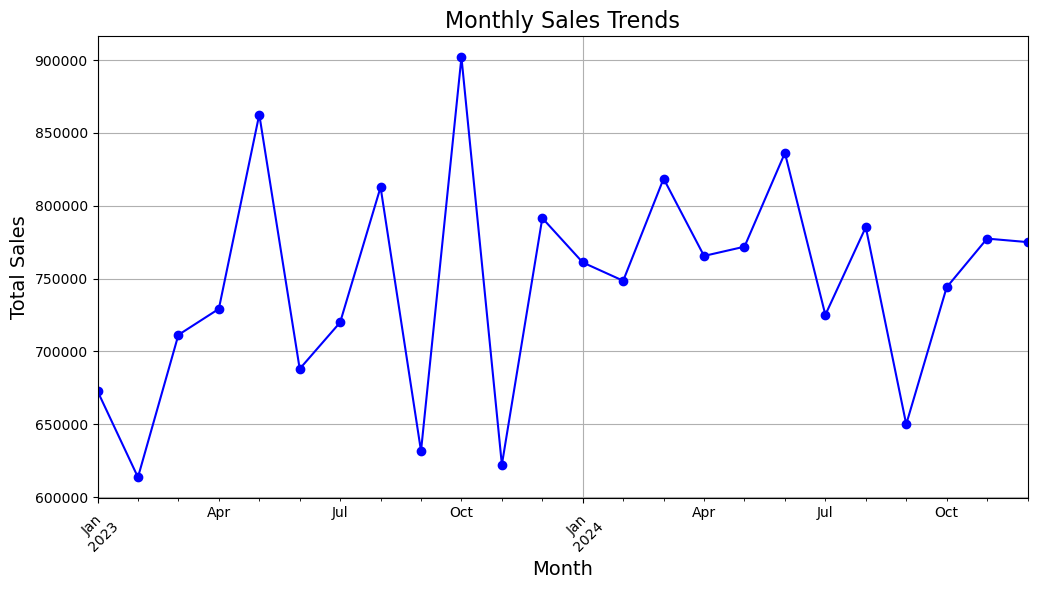

In [45]:
# Monthly Sales Trends
import seaborn as sns
import matplotlib.pyplot as plt
sales_trends = sales_data.groupby(sales_data["Order_Date"].dt.to_period("M"))["Total_Sales"].sum()

# Plot Sales Trends
plt.figure(figsize=(12, 6))
sales_trends.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Sales Trends", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Customer Segmentation

C:\Users\Anusha A M\AppData\Local\Temp\ipykernel_5500\1398638267.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_spenders, x="Segment", palette="viridis")


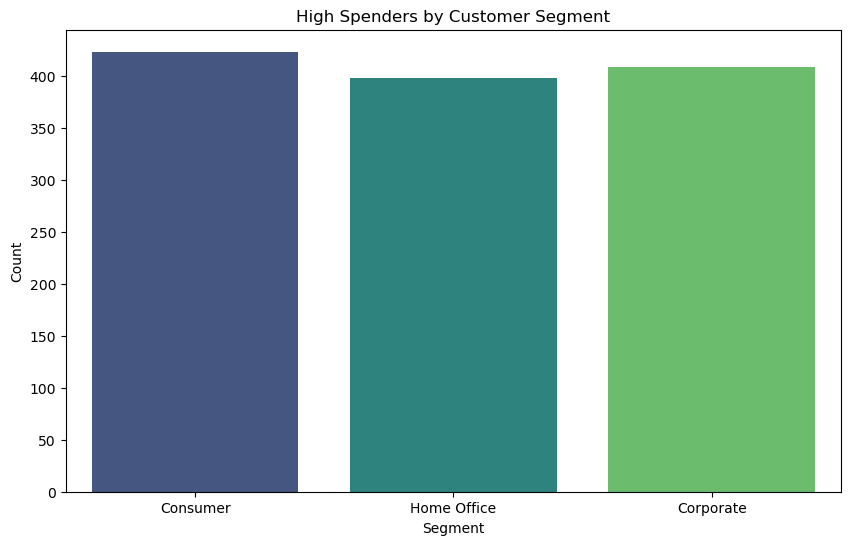

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
high_spenders = sales_data[sales_data["Avg_Spend"] > sales_data["Avg_Spend"].quantile(0.75)]
frequent_buyers = sales_data[sales_data["Repeat_Purchases"] > sales_data["Repeat_Purchases"].quantile(0.75)]
    
# Visualization: High Spenders by Segment
plt.figure(figsize=(10, 6))
sns.countplot(data=high_spenders, x="Segment", palette="viridis")
plt.title("High Spenders by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

#### Correlation Analysis

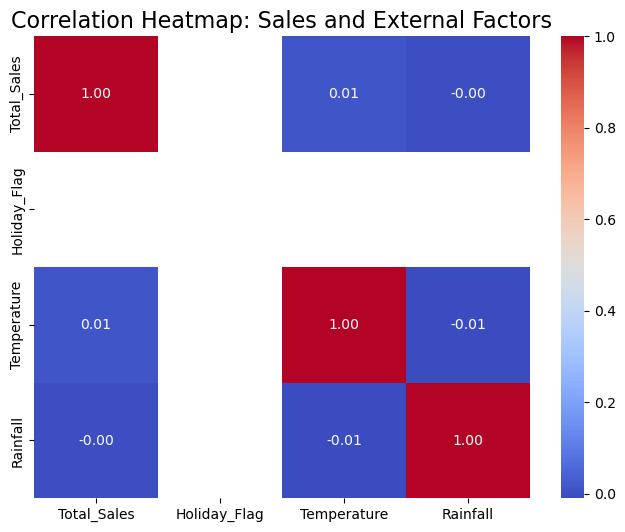

In [50]:
# Correlation Analysis: Sales, Weather, and Holidays
correlation_data = sales_data[["Total_Sales", "Holiday_Flag", "Temperature", "Rainfall"]]
correlation_matrix = correlation_data.corr()

# Heatmap of Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Sales and External Factors", fontsize=16)
plt.show()

### Time Series Trends

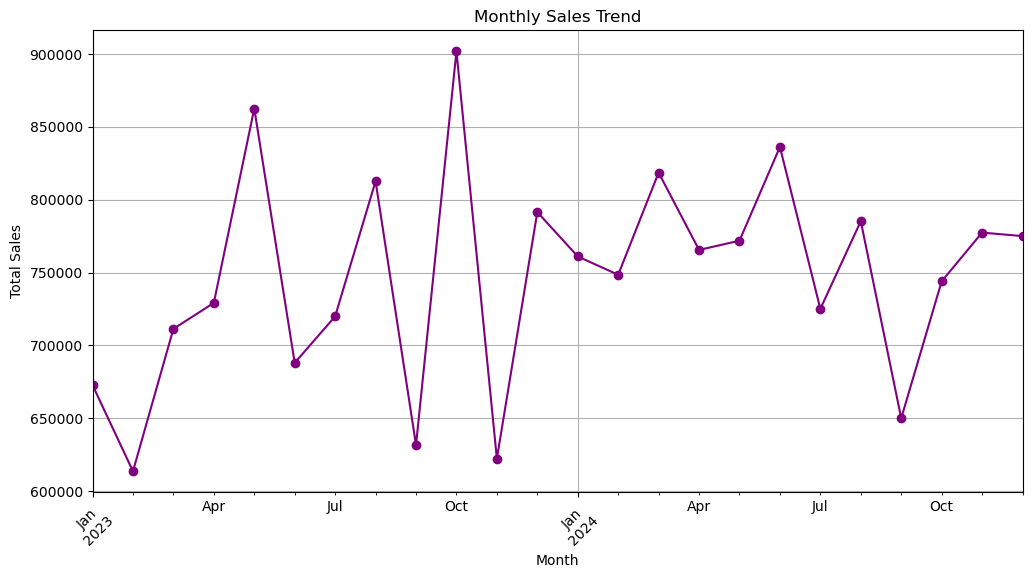

In [52]:

monthly_sales = sales_data.groupby(sales_data["Order_Date"].dt.to_period("M"))["Total_Sales"].sum()

# Visualization: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind="line", marker="o", color="purple")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Geographic Heatmap for Store Performance

C:\Users\Anusha A M\AppData\Local\Temp\ipykernel_5500\61384030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x="City", y="Total_Sales", palette="mako")


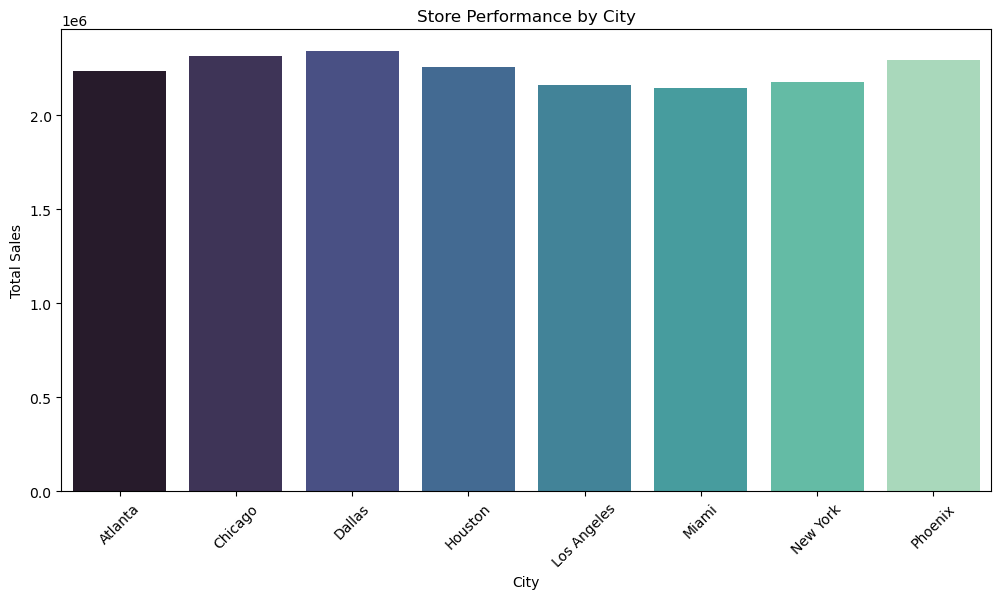

In [54]:
 
store_sales = sales_data.groupby("City")["Total_Sales"].sum().reset_index()

# Visualization: Store Performance Heatmap
plt.figure(figsize=(12, 6))
sns.barplot(data=store_sales, x="City", y="Total_Sales", palette="mako")
plt.title("Store Performance by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## Step 5  Advanced Analyitcs 

### Statistical Analysis: Identify Drivers of Sales


Understand relationships between variables like Sales, Profit, Discount, and external factors (e.g., Weather_Condition, Holiday_Flag).

#### 1. Correlation Analysis: 
    • Use correlation heatmaps to identify relationships between numerical variables. 
    • Example: How do Discount and Profit correlate with Total_Sales? 
#### 2. Regression Analysis: 
    • Use multiple linear regression to identify key drivers of Total_Sales. 
    • Example: Assess the impact of Discount, Holiday_Flag, and Weather_Condition on Total_Sales.

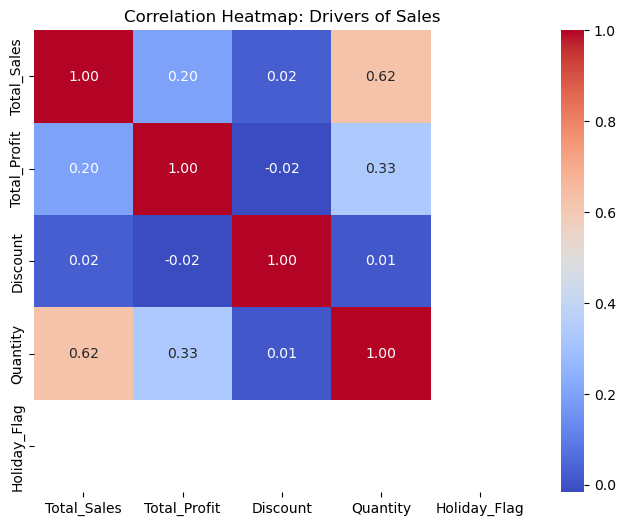

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for correlation
correlation_data = sales_data[["Total_Sales", "Total_Profit", "Discount", "Quantity", "Holiday_Flag"]]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Drivers of Sales")
plt.show()

In [58]:
import statsmodels.api as sm

# Prepare data for regression
regression_data = sales_data[["Total_Sales", "Discount", "Holiday_Flag", "Quantity"]].dropna()
X = regression_data[["Discount", "Holiday_Flag", "Quantity"]]  # Independent variables
y = regression_data["Total_Sales"]  # Dependent variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1567.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):               0.00
Time:                        14:50:23   Log-Likelihood:                -45250.
No. Observations:                4935   AIC:                         9.051e+04
Df Residuals:                    4932   BIC:                         9.053e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           80.3691     89.601      0.897   

C:\Users\Anusha A M\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


### Customer Segmentation Using Clustering


Group customers into segments (e.g., high spenders, frequent buyers) using clustering techniques like K-Means.

#### Steps 
    1. Prepare Data: 
    •Use features like Avg_Spend, Repeat_Purchases, and Total_Sales for clustering. 
    2. Apply K-Means Clustering: 
    • Choose an optimal number of clusters using the elbow method.
    3. Visualize Segments:
    • Use scatter plots to visualize clusters.

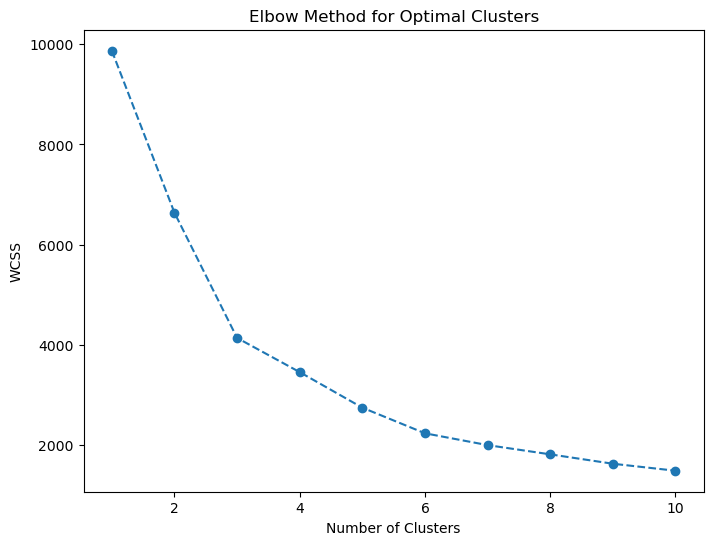

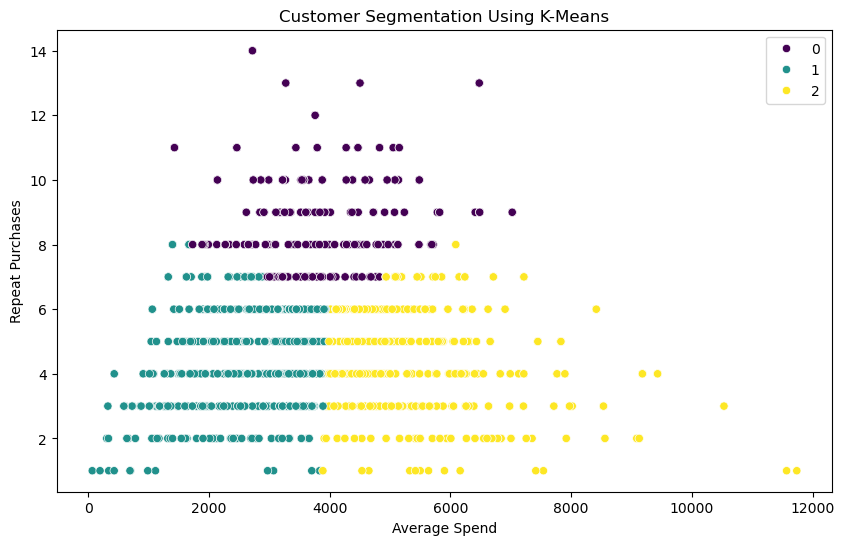

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for clustering
clustering_data = sales_data[["Avg_Spend", "Repeat_Purchases"]].dropna()
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Find optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-Means with optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# Add cluster labels to the dataset
sales_data["Customer_Cluster"] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data["Avg_Spend"],
    y=clustering_data["Repeat_Purchases"],
    hue=clusters,
    palette="viridis"
)
plt.title("Customer Segmentation Using K-Means")
plt.xlabel("Average Spend")
plt.ylabel("Repeat Purchases")
plt.show()

### Store Performance Analysis

#### Identify Patterns in Low-Performing Stores or Products

Analyze stores/products with low performance to identify actionable insights.

#### Steps
	1.	Aggregate Sales by Store/Category:
	•	Rank stores or products based on Total_Sales.
	2.	Analyze Common Characteristics:
	•	Check if low performance correlates with high discounts, poor customer engagement, or specific weather conditions.
	3.	Provide Recommendations:
	•	Suggest actions to improve product placements, promotions, or inventory.

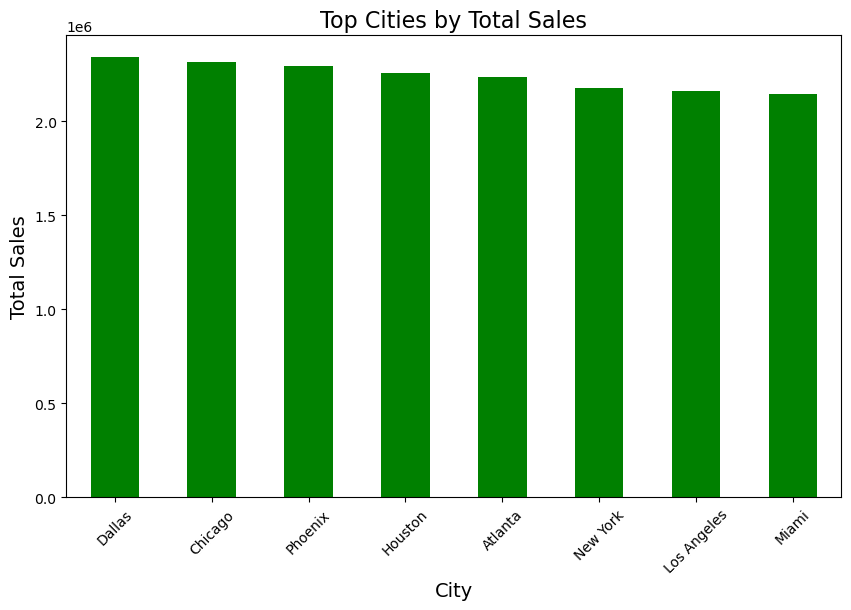

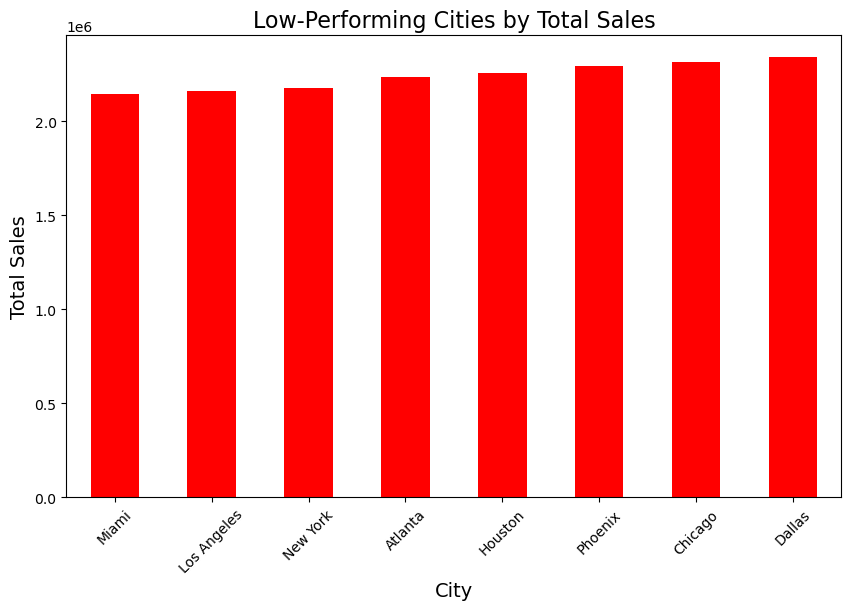

In [63]:
# Top-Performing Cities
top_cities = sales_data.groupby("City")["Total_Sales"].sum().sort_values(ascending=False).head(10)

# Plot Top Cities
plt.figure(figsize=(10, 6))
top_cities.plot(kind="bar", color="green")
plt.title("Top Cities by Total Sales", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Low-Performing Cities
low_cities = sales_data.groupby("City")["Total_Sales"].sum().sort_values().head(10)

# Plot Low Cities
plt.figure(figsize=(10, 6))
low_cities.plot(kind="bar", color="red")
plt.title("Low-Performing Cities by Total Sales", fontsize=16)
plt.xlabel("City", fontsize=14)
plt.ylabel("Total Sales", fontsize=14)
plt.xticks(rotation=45)
plt.show()

## Insights and Recommendations

### Key Insights
1. **Sales Trends**:
   - Sales show significant peaks during holiday months (e.g., Black Friday, Christmas).
   - External factors like weather (rainfall, temperature) have moderate correlations with sales.

2. **Customer Segmentation**:
   - High spenders and frequent buyers are concentrated in specific regions (e.g., East and West).
   - Clustering identified three customer groups based on spending and purchasing patterns.

3. **Store Performance**:
   - Certain cities consistently outperform others in terms of total sales.
   - Low-performing cities often have high discounts but low engagement.

### Recommendations
1. Focus on promoting high-margin products in low-performing cities.
2. Tailor marketing campaigns to target high spenders and frequent buyers in top regions.
3. Leverage insights from weather and holidays to plan inventory and marketing strategies.
4. Optimize product placement and discounts in low-performing stores to boost sales.